In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [37]:
data=pd.read_csv('C:\\Users\\utsav patel\\Desktop\\insurance.csv')

In [38]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# CATEGORICAL DATA

In [40]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [41]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [42]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# LABEL ENCODING

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex=le.transform(data.sex)

le=LabelEncoder()
le.fit(data.smoker.drop_duplicates())
data.smoker=le.transform(data.smoker)

le=LabelEncoder()
le.fit(data.region.drop_duplicates())
data.region=le.transform(data.region)

# DATA CORRELATION

In [44]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

# SMOKER ANALYSIS

C:\Users\utsav patel\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


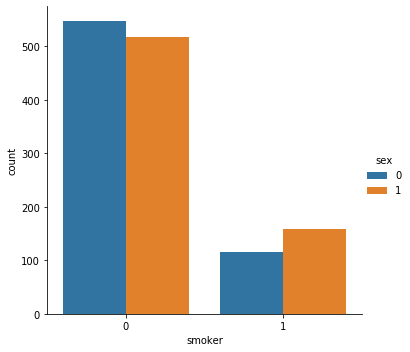

In [45]:
sns.factorplot(x="smoker",kind="count",hue='sex',data=data)

# BMI 

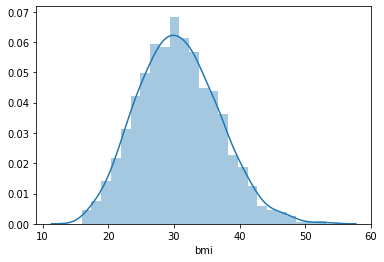

In [46]:
ax=sns.distplot(data["bmi"])

# NO. OF CHILDREN

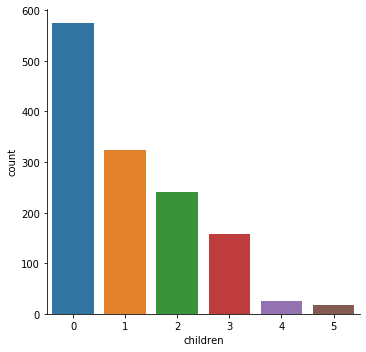

In [47]:
sns.factorplot(x="children",kind="count",data=data)

# SPLITTING DATA

In [48]:
x=data.drop(data.columns[[6,5]],axis=1)
y=data['charges']


In [49]:
x

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [50]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

# FEATURE SCALING

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
sc_x=MinMaxScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.fit_transform(xtest)

# ML MODELS

In [54]:
linear=LinearRegression()
dt=DecisionTreeRegressor()
svr=svm.SVR()
rf=RandomForestRegressor()

In [55]:
linear.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [57]:
svr.fit(xtrain,ytrain)

C:\Users\utsav patel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
rf.fit(xtrain,ytrain)

C:\Users\utsav patel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# PREDICTION

In [59]:
y_pred_linear=linear.predict(xtest)

In [60]:
y_pred_dt=dt.predict(xtest)

In [61]:
y_pred_svr=svr.predict(xtest)

In [62]:
y_pred_rf=rf.predict(xtest)

C:\Users\utsav patel\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


# ROOT MEAN SQUARE ERROR

In [63]:
import math
error_linear=math.sqrt(mean_squared_error((y_pred_linear),ytest))
error_dt=math.sqrt(mean_squared_error((y_pred_dt),ytest))
error_svr=math.sqrt(mean_squared_error((y_pred_svr),ytest))
error_rf=math.sqrt(mean_squared_error((y_pred_rf),ytest))

In [65]:
print("       model       : root mean square error\n")
print("Linear Regression  : ",      error_linear)
print("Decision Tree      : ",      error_dt)
print("Support Vector     : ",      error_svr)
print("Random Forest      : ",      error_rf)

       model       : root mean square error

Linear Regression  :  6251.003599251098
Decision Tree      :  6415.964752068871
Support Vector     :  14237.310113920432
Random Forest      :  4959.506917758291
